# PHÂN TÍCH ĐIỂM THI THPT QUỐC GIA TẠI HAI KHU VỰC
# TUYÊN QUANG VÀ HÀ GIANG

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Crawl điểm thi THPT Quốc Gia tỉnh Tuyên Quang

In [16]:
# Khởi tạo một danh sách để lưu trữ dữ liệu
data = []

In [17]:
# Duyệt qua các số báo danh từ 9000001 đến 9001000
for x in range(9000001, 9001001):
    # Tạo URL cho từng số báo danh
    url = 'https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2023/' + '0' + str(x) + '.html'
    headers = {}

    # Gửi yêu cầu GET tới URL
    response = requests.request("GET", url, headers=headers)
    
    # Kiểm tra nếu yêu cầu thành công (mã trạng thái 200)
    if response.status_code == 200:
        # Phân tích nội dung HTML bằng BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Tìm phần <tbody>
        tbody = soup.find('tbody')
        
        if tbody:
            # In ra các hàng (rows) trong <tbody>
            rows = tbody.find_all('tr')
            for row in rows:
                # In ra các cột (columns) trong mỗi hàng
                cols = row.find_all('td')
                cols = [col.text.strip() for col in cols]  # Lấy nội dung văn bản và loại bỏ khoảng trắng thừa
                
                # Thêm dữ liệu vào danh sách
                # Giả sử cấu trúc của cols là [Môn, Điểm]
                if len(cols) == 2:
                    data.append([x, cols[0], cols[1]])
        else:
            print(f'Số báo danh {x}: Không tìm thấy <tbody>')
    else:
        print(f'Số báo danh {x} không truy cập được. Mã trạng thái: {response.status_code}')

In [18]:
if data:
    # Tạo DataFrame từ danh sách dữ liệu với các cột: SBD, Môn, Điểm
    df = pd.DataFrame(data, columns=['SBD', 'Môn', 'Điểm'])
    
    # Chuyển đổi DataFrame sang dạng hàng ngang với các điểm môn học trong các cột tương ứng
    df_pivot = df.pivot(index='SBD', columns='Môn', values='Điểm')
    
    # Reset lại chỉ mục để biến cột SBD trở thành một cột thông thường
    df_pivot = df_pivot.reset_index()
    
    # Hiển thị DataFrame đã chuyển đổi
    print(df_pivot.to_string(index=False))
else:
    print("Không có dữ liệu để hiển thị.")

    SBD GDCD  Hóa   Lí Ngoại ngữ Sinh   Sử Toán  Văn  Địa
9000001 9.75  NaN  NaN         7  NaN 8.75  7.4 9.25 7.25
9000002 9.25  NaN  NaN         7  NaN  7.5    7 7.25    7
9000003  NaN 8.25    8       7.2 7.75  NaN  7.4 7.75  NaN
9000004  NaN  NaN  NaN       NaN  NaN 3.75  2.8  2.5 6.25
9000005 9.75  NaN  NaN         7  NaN 9.25  6.8  7.5 8.25
9000006 9.75  NaN  NaN       5.6  NaN  7.5  8.2 7.75 6.75
9000007 9.25  NaN  NaN         6  NaN  9.5  7.8 7.75 6.75
9000008  NaN  NaN  NaN       NaN  NaN  3.5  2.4 3.75    6
9000009  NaN  NaN  NaN       NaN  NaN 3.25  3.2 2.75    6
9000010  NaN 8.25    8       6.4 8.25  NaN  7.8  6.5  NaN
9000011  NaN  NaN  NaN       NaN  NaN    5  2.6 3.75 5.25
9000012  NaN  NaN  NaN       NaN  NaN    4  3.6 5.25 6.25
9000013  NaN  NaN  NaN       NaN  NaN  4.5  3.2 5.75 6.75
9000014 8.75  NaN  NaN       5.8  NaN    8  7.2  7.5 5.25
9000015  NaN  NaN  NaN       NaN  NaN    5  4.8 5.75 6.25
9000016  NaN  NaN  NaN       NaN  NaN 3.75  3.4  3.5 5.75
9000017  6.5  

In [19]:
#thông tin data frame
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBD        1000 non-null   int64 
 1   GDCD       473 non-null    object
 2   Hóa        328 non-null    object
 3   Lí         328 non-null    object
 4   Ngoại ngữ  796 non-null    object
 5   Sinh       328 non-null    object
 6   Sử         672 non-null    object
 7   Toán       1000 non-null   object
 8   Văn        1000 non-null   object
 9   Địa        672 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.3+ KB


In [20]:
df_khxh_tq = df_pivot[['SBD','Toán', 'Văn', 'Ngoại ngữ', 'GDCD', 'Sử', 'Địa']].dropna()

print(df_khxh_tq.to_string(index=False))
print('\n')

df_khtn_tq = df_pivot[['SBD','Toán', 'Văn', 'Ngoại ngữ', 'Hóa', 'Lí', 'Sinh']].dropna()

print(df_khtn_tq.to_string(index=False))

    SBD Toán  Văn Ngoại ngữ GDCD   Sử  Địa
9000001  7.4 9.25         7 9.75 8.75 7.25
9000002    7 7.25         7 9.25  7.5    7
9000005  6.8  7.5         7 9.75 9.25 8.25
9000006  8.2 7.75       5.6 9.75  7.5 6.75
9000007  7.8 7.75         6 9.25  9.5 6.75
9000014  7.2  7.5       5.8 8.75    8 5.25
9000017  6.2  6.5       3.2  6.5 6.25 5.25
9000019  7.6  8.5       7.2 8.75 8.25  6.5
9000021  5.8  7.5         5  7.5 7.75 6.75
9000024  6.6 7.75       7.2 7.75  7.5    7
9000025  6.6 8.75       7.2  8.5 9.25    8
9000038  7.6 8.25         6 8.25 7.75 5.75
9000043  6.8  8.5       4.8 8.75 8.25 8.25
9000045  7.6    8       6.4 9.25  8.5  7.5
9000046  7.4  7.5         6  7.5  7.5 6.75
9000047  7.4    6         7 8.25  7.5  6.5
9000052  7.4 8.75       6.6    9  9.5  9.5
9000053  7.6    9         7  9.5    9  9.5
9000054  7.6    8       6.6 9.25 9.25 9.25
9000059  5.2    8       5.8 8.75    9 7.75
9000061    6    9       8.8 9.25 9.25  7.5
9000063  7.2 7.75         8  9.5    8    7
9000065  7.

In [21]:
df_khxh_tq[['Toán', 'Văn', 'Ngoại ngữ', 'GDCD', 'Sử', 'Địa']] = df_khxh_tq[['Toán', 'Văn', 'Ngoại ngữ', 'GDCD', 'Sử', 'Địa']].apply(pd.to_numeric)
df_khxh_tq['SBD'] = df_khxh_tq['SBD'].astype(str)

print('Bộ dữ liệu của khoa học xã hội: \n')
df_khxh_tq.info()
print('-----')
df_khxh_tq.describe()

Bộ dữ liệu của khoa học xã hội: 

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 998
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SBD        471 non-null    object 
 1   Toán       471 non-null    float64
 2   Văn        471 non-null    float64
 3   Ngoại ngữ  471 non-null    float64
 4   GDCD       471 non-null    float64
 5   Sử         471 non-null    float64
 6   Địa        471 non-null    float64
dtypes: float64(6), object(1)
memory usage: 29.4+ KB
-----


Môn,Toán,Văn,Ngoại ngữ,GDCD,Sử,Địa
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,6.666242,7.332272,7.024628,8.713376,7.329618,6.727176
std,1.271164,1.186470,1.857907,0.837049,1.449882,1.214774
min,2.000000,3.250000,1.800000,6.000000,2.000000,3.000000
25%,5.900000,6.500000,5.600000,8.250000,6.250000,5.750000
50%,7.000000,7.500000,7.000000,8.750000,7.500000,6.750000
75%,7.600000,8.250000,8.800000,9.250000,8.500000,7.500000
max,8.800000,9.750000,10.000000,10.000000,9.750000,9.500000


In [22]:
df_khtn_tq[['Toán', 'Văn', 'Ngoại ngữ', 'Hóa', 'Lí', 'Sinh']] = df_khtn_tq[['Toán', 'Văn', 'Ngoại ngữ', 'Hóa', 'Lí', 'Sinh']].apply(pd.to_numeric)
df_khtn_tq['SBD'] = df_khtn_tq['SBD'].astype(str)

print('Bộ dữ liệu của khoa học tự nhiên: \n')
df_khtn_tq.info()
print('-----')
df_khtn_tq.describe()

Bộ dữ liệu của khoa học tự nhiên: 

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, 2 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SBD        325 non-null    object 
 1   Toán       325 non-null    float64
 2   Văn        325 non-null    float64
 3   Ngoại ngữ  325 non-null    float64
 4   Hóa        325 non-null    float64
 5   Lí         325 non-null    float64
 6   Sinh       325 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.3+ KB
-----


Môn,Toán,Văn,Ngoại ngữ,Hóa,Lí,Sinh
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,7.742769,6.892308,7.798769,7.433077,6.942308,7.126154
std,0.705042,0.944413,1.583089,1.072930,1.304350,1.134412
min,4.800000,3.250000,3.600000,3.750000,3.250000,3.500000
25%,7.400000,6.250000,6.800000,6.750000,6.250000,6.250000
50%,7.800000,7.000000,8.400000,7.500000,7.250000,7.250000
75%,8.200000,7.500000,9.000000,8.250000,8.000000,8.000000
max,9.400000,9.250000,10.000000,9.750000,9.250000,9.250000


## Crawl điểm thi THPT Quốc Gia tỉnh Hà Giang

In [27]:
data1 = []

In [28]:
for x in range(5000001, 5001001): 
    # Tạo URL cho từng số báo danh
    url = 'https://vietnamnet.vn/giao-duc/diem-thi/tra-cuu-diem-thi-tot-nghiep-thpt/2023/' + '0' + str(x) + '.html'
    headers = {}

    # Gửi yêu cầu GET tới URL
    response = requests.request("GET", url, headers=headers)
    
    # Kiểm tra nếu yêu cầu thành công (mã trạng thái 200)
    if response.status_code == 200:
        # Phân tích nội dung HTML bằng BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Tìm phần <tbody>
        tbody = soup.find('tbody')
        
        if tbody:
            # In ra các hàng (rows) trong <tbody>
            rows = tbody.find_all('tr')
            for row in rows:
                # In ra các cột (columns) trong mỗi hàng
                cols = row.find_all('td')
                cols = [col.text.strip() for col in cols]  # Lấy nội dung văn bản và loại bỏ khoảng trắng thừa
                
                # Thêm dữ liệu vào danh sách
                # Giả sử cấu trúc của cols là [Môn, Điểm]
                if len(cols) == 2:
                    data1.append([x, cols[0], cols[1]])
        else:
            print(f'Số báo danh {x}: Không tìm thấy <tbody>')
    else:
        print(f'Số báo danh {x} không truy cập được. Mã trạng thái: {response.status_code}')

In [29]:
if data1:
    # Tạo DataFrame từ danh sách dữ liệu với các cột: SBD, Môn, Điểm
    df_hg = pd.DataFrame(data1, columns=['SBD', 'Môn', 'Điểm'])
    
    # Chuyển đổi DataFrame sang dạng hàng ngang với các điểm môn học trong các cột tương ứng
    df_pivot_hg = df_hg.pivot(index='SBD', columns='Môn', values='Điểm')
    
    # Reset lại chỉ mục để biến cột SBD trở thành một cột thông thường
    df_pivot_hg.reset_index(inplace=True)
    
    # Hiển thị DataFrame đã chuyển đổi
    print(df_pivot_hg.to_string(index=False))
else:
    print("Không có dữ liệu để hiển thị.")

    SBD GDCD  Hóa   Lí Ngoại ngữ Sinh   Sử Toán  Văn  Địa
5000001  NaN    7 7.25       NaN  NaN  NaN  8.2  NaN  NaN
5000002 9.25  NaN  NaN       9.8  NaN 8.25  7.2 7.25    7
5000003 7.75  NaN  NaN       8.8  NaN 6.75  8.6 8.25  6.5
5000004 9.25  NaN  NaN       6.6  NaN 8.25  8.4  8.5 7.75
5000005  NaN 6.25    7       8.8  5.5  NaN  6.6  3.5  NaN
5000006  NaN    4    8         9    4  NaN    8 5.25  NaN
5000007  NaN    7  8.5         9  5.5  NaN  7.8 7.75  NaN
5000008    9  NaN  NaN       9.2  NaN 7.75  8.2 9.25 7.25
5000009  8.5  NaN  NaN       9.2  NaN  5.5  7.6 8.75    6
5000010 7.25  NaN  NaN         9  NaN 6.75  7.8 8.25  5.5
5000011  NaN 6.25  7.5       8.2  6.5  NaN  7.8  7.5  NaN
5000012 8.75  NaN  NaN         7  NaN 5.75  5.8    8 5.25
5000013 9.75  NaN  NaN       8.6  NaN 5.75  7.6    9 5.75
5000014  NaN  4.5 7.75       8.2 5.25  NaN  8.2 7.75  NaN
5000015  NaN  7.5 7.75       6.6  5.5  NaN  7.8  5.5  NaN
5000016  NaN 5.75  5.5       6.2  6.5  NaN  6.2  3.5  NaN
5000017 8.25  

In [30]:
df_pivot_hg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SBD        998 non-null    int64 
 1   GDCD       678 non-null    object
 2   Hóa        192 non-null    object
 3   Lí         193 non-null    object
 4   Ngoại ngữ  870 non-null    object
 5   Sinh       187 non-null    object
 6   Sử         798 non-null    object
 7   Toán       907 non-null    object
 8   Văn        988 non-null    object
 9   Địa        793 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB


In [31]:
df_khxh_hg = df_pivot_hg[['SBD','Toán', 'Văn', 'Ngoại ngữ', 'GDCD', 'Sử', 'Địa']].dropna()

print(df_khxh_hg.to_string(index=False))
print('\n')

df_khtn_hg = df_pivot_hg[['SBD','Toán', 'Văn', 'Ngoại ngữ', 'Hóa', 'Lí', 'Sinh']].dropna()

print(df_khtn_hg.to_string(index=False))

    SBD Toán  Văn Ngoại ngữ GDCD   Sử  Địa
5000002  7.2 7.25       9.8 9.25 8.25    7
5000003  8.6 8.25       8.8 7.75 6.75  6.5
5000004  8.4  8.5       6.6 9.25 8.25 7.75
5000008  8.2 9.25       9.2    9 7.75 7.25
5000009  7.6 8.75       9.2  8.5  5.5    6
5000010  7.8 8.25         9 7.25 6.75  5.5
5000012  5.8    8         7 8.75 5.75 5.25
5000013  7.6    9       8.6 9.75 5.75 5.75
5000017  7.4 7.25       8.6 8.25 6.25    6
5000018    7 8.25       7.6    8 7.25 6.75
5000019  5.4 8.75       8.6  7.5 6.75  5.5
5000022  6.6 8.25       7.4 8.25  5.5    5
5000023  7.6    9       7.6 8.25 6.75 6.25
5000024  6.2    6       4.2  6.5 8.25 6.25
5000025  8.2  8.5       7.8    7    5    6
5000031  6.8 7.25       8.4 8.75    8    9
5000034  7.6  6.5         9  7.5 4.25 5.25
5000046  8.2 8.75         9   10  8.5  8.5
5000051  6.8 7.75         8 7.25 5.25 5.75
5000059  8.6 8.75       9.8    9  7.5  6.5
5000061  6.2 6.75         8    9 6.25 6.25
5000067    8    8       9.2 7.75 6.75  5.5
5000076  7.

In [32]:
df_khxh_hg[['Toán', 'Văn', 'Ngoại ngữ', 'GDCD', 'Sử', 'Địa']] = df_khxh_hg[['Toán', 'Văn', 'Ngoại ngữ', 'GDCD', 'Sử', 'Địa']].apply(pd.to_numeric)
df_khxh_hg['SBD'] = df_khxh_hg['SBD'].astype(str)

print('Bộ dữ liệu của khoa học xã hội: \n')
df_khxh_hg.info()
print('-----')
df_khxh_hg.describe()

Bộ dữ liệu của khoa học xã hội: 

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 1 to 997
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SBD        675 non-null    object 
 1   Toán       675 non-null    float64
 2   Văn        675 non-null    float64
 3   Ngoại ngữ  675 non-null    float64
 4   GDCD       675 non-null    float64
 5   Sử         675 non-null    float64
 6   Địa        675 non-null    float64
dtypes: float64(6), object(1)
memory usage: 42.2+ KB
-----


Môn,Toán,Văn,Ngoại ngữ,GDCD,Sử,Địa
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,4.681778,5.841111,4.731556,7.545926,5.597778,5.622963
std,1.932068,1.701216,2.373993,1.402798,1.685565,1.329543
min,1.200000,1.750000,1.200000,1.750000,1.750000,1.500000
25%,3.200000,4.500000,3.000000,6.750000,4.250000,4.750000
50%,4.200000,5.500000,3.800000,7.750000,5.500000,5.750000
75%,6.400000,7.000000,6.600000,8.500000,6.750000,6.500000
max,9.000000,9.250000,9.800000,10.000000,10.000000,9.250000


In [33]:
df_khtn_hg[['Toán', 'Văn', 'Ngoại ngữ', 'Hóa', 'Lí', 'Sinh']] = df_khtn_hg[['Toán', 'Văn', 'Ngoại ngữ', 'Hóa', 'Lí', 'Sinh']].apply(pd.to_numeric)
df_khtn_hg['SBD'] = df_khtn_hg['SBD'].astype(str)

print('Bộ dữ liệu của khoa học tự nhiên: \n')
df_khtn_hg.info()
print('-----')
df_khtn_hg.describe()

Bộ dữ liệu của khoa học tự nhiên: 

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 4 to 958
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SBD        183 non-null    object 
 1   Toán       183 non-null    float64
 2   Văn        183 non-null    float64
 3   Ngoại ngữ  183 non-null    float64
 4   Hóa        183 non-null    float64
 5   Lí         183 non-null    float64
 6   Sinh       183 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.4+ KB
-----


Môn,Toán,Văn,Ngoại ngữ,Hóa,Lí,Sinh
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,7.810929,6.114754,7.324590,6.767760,6.983607,6.464481
std,0.838818,1.289146,1.785348,1.418345,1.432934,1.289793
min,2.400000,3.000000,2.800000,3.000000,2.750000,3.500000
25%,7.600000,5.250000,6.100000,5.750000,6.250000,5.500000
50%,8.000000,6.000000,7.800000,6.750000,7.250000,6.500000
75%,8.400000,7.000000,8.800000,8.000000,8.000000,7.250000
max,9.400000,9.250000,9.600000,9.500000,9.250000,9.500000


In [34]:
with pd.ExcelWriter("D:/APD/1.Giáo dục chuyên nghiệp (Bắt buộc) - Chuyên ngành/Khai phá dữ liệu cho phân tích kinh doanh/BT nhóm 1.xlsx", engine='openpyxl') as writer:
    df_khxh_tq.to_excel(writer, sheet_name='KHXH-TQ', index=False)
    df_khtn_tq.to_excel(writer, sheet_name='KHTN-TQ', index=False)
    df_khxh_hg.to_excel(writer, sheet_name='KHXH-HG', index=False)
    df_khtn_hg.to_excel(writer, sheet_name='KHTN-HG', index=False)

## Phân tích

In [1]:
import pandas as pd
f = pd.ExcelFile("D:/APD/1.Giáo dục chuyên nghiệp (Bắt buộc) - Chuyên ngành/Khai phá dữ liệu cho phân tích kinh doanh/BT nhóm 1.xlsx")
df1 = pd.read_excel(f, sheet_name=0)
df2 = pd.read_excel(f, sheet_name=1)
df3 = pd.read_excel(f, sheet_name=2)
df4 = pd.read_excel(f, sheet_name=3)

In [2]:
df12 = pd.concat([df1, df2], axis=0)

In [3]:
df12=df12[['Toán', 'Văn', 'Ngoại ngữ']]

In [4]:
df12.head()

,Toán,Văn,Ngoại ngữ
0,7.4,9.25,7.0
1,7.0,7.25,7.0
2,6.8,7.50,7.0
3,8.2,7.75,5.6
4,7.8,7.75,6.0


In [5]:
df34 = pd.concat([df3, df4], axis=0)

In [6]:
df34=df34[['Toán', 'Văn', 'Ngoại ngữ']]

In [7]:
df34.head()

,Toán,Văn,Ngoại ngữ
0,7.2,7.25,9.8
1,8.6,8.25,8.8
2,8.4,8.50,6.6
3,8.2,9.25,9.2
4,7.6,8.75,9.2


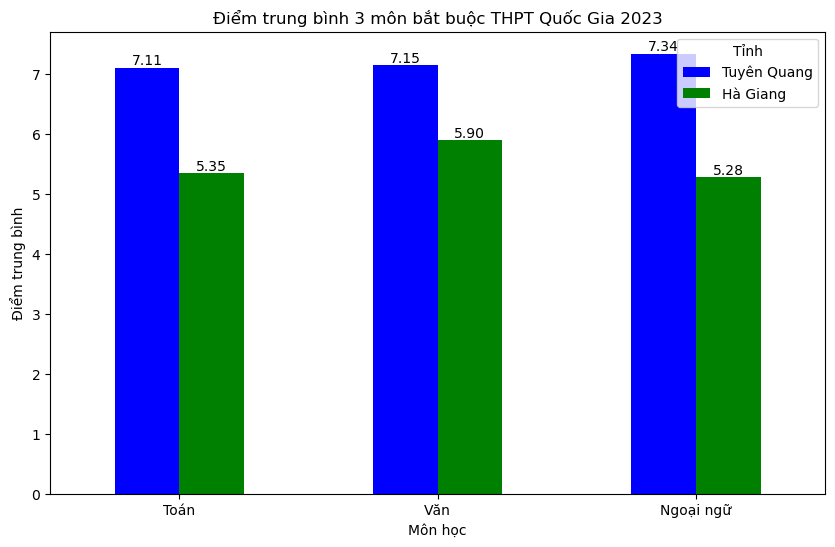

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính điểm trung bình của mỗi môn cho từng tỉnh
avg_scores_tuyen_quang = df12.mean()
avg_scores_ha_giang = df34.mean()

# Tạo DataFrame chứa điểm trung bình của cả hai tỉnh
avg_scores = pd.DataFrame({
    'Tuyên Quang': avg_scores_tuyen_quang,
    'Hà Giang': avg_scores_ha_giang
})

# Vẽ biểu đồ cột ghép
ax = avg_scores.plot(kind='bar', color=['blue', 'green'], figsize=(10, 6))

# Thêm số trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Điểm trung bình 3 môn bắt buộc THPT Quốc Gia 2023')
plt.xlabel('Môn học')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=0)
plt.legend(title='Tỉnh')

# Hiển thị biểu đồ
plt.show()

In [9]:
df1xh=df1[['GDCD', 'Sử', 'Địa']]
df3xh=df3[['GDCD', 'Sử', 'Địa']]

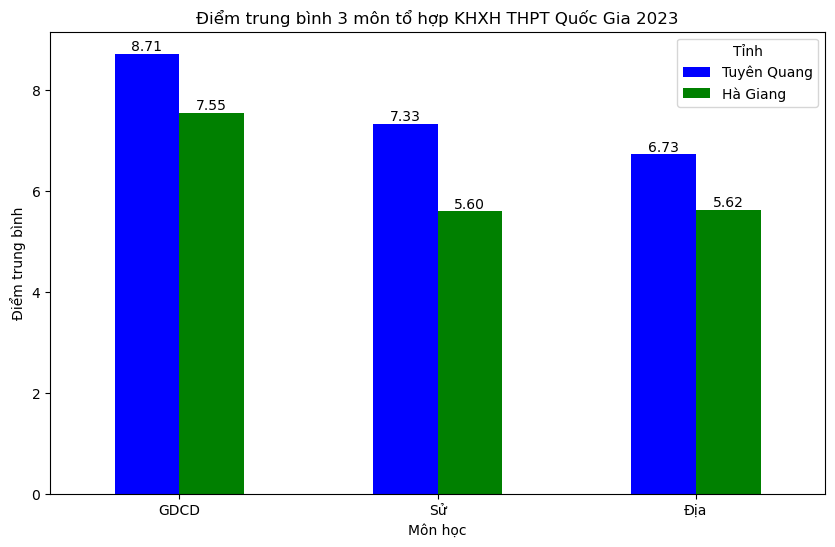

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính điểm trung bình của mỗi môn cho từng tỉnh
avg_scores_tuyen_quang = df1xh.mean()
avg_scores_ha_giang = df3xh.mean()

# Tạo DataFrame chứa điểm trung bình của cả hai tỉnh
avg_scores = pd.DataFrame({
    'Tuyên Quang': avg_scores_tuyen_quang,
    'Hà Giang': avg_scores_ha_giang
})

# Vẽ biểu đồ cột ghép
ax = avg_scores.plot(kind='bar', color=['blue', 'green'], figsize=(10, 6))

# Thêm số trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Điểm trung bình 3 môn tổ hợp KHXH THPT Quốc Gia 2023')
plt.xlabel('Môn học')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=0)
plt.legend(title='Tỉnh')

# Hiển thị biểu đồ
plt.show()

In [11]:
df2tn=df2[['Lí', 'Hóa', 'Sinh']]
df4tn=df4[['Lí', 'Hóa', 'Sinh']]

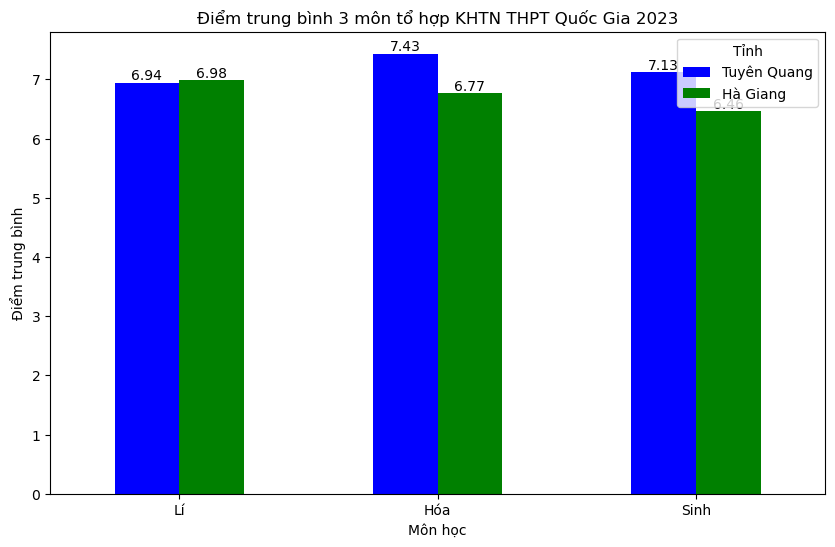

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Tính điểm trung bình của mỗi môn cho từng tỉnh
avg_scores_tuyen_quang = df2tn.mean()
avg_scores_ha_giang = df4tn.mean()

# Tạo DataFrame chứa điểm trung bình của cả hai tỉnh
avg_scores = pd.DataFrame({
    'Tuyên Quang': avg_scores_tuyen_quang,
    'Hà Giang': avg_scores_ha_giang
})

# Vẽ biểu đồ cột ghép
ax = avg_scores.plot(kind='bar', color=['blue', 'green'], figsize=(10, 6))

# Thêm số trên mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Điểm trung bình 3 môn tổ hợp KHTN THPT Quốc Gia 2023')
plt.xlabel('Môn học')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=0)
plt.legend(title='Tỉnh')

# Hiển thị biểu đồ
plt.show()

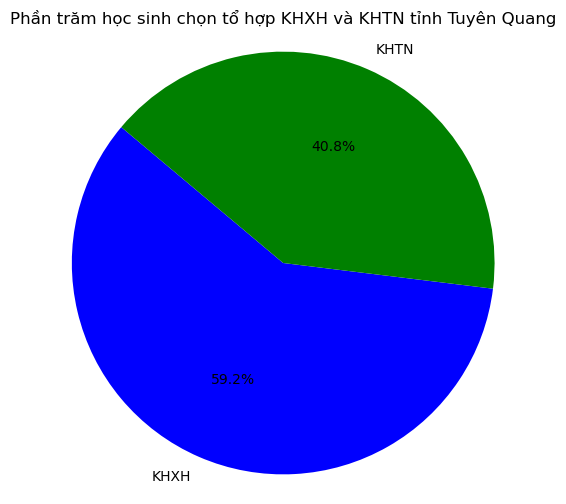

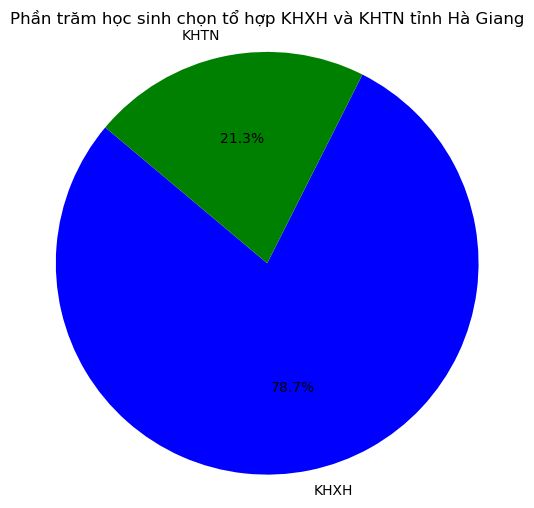

In [50]:
# Số lượng học sinh của tỉnh
count_class1 = len(df1)
count_class2 = len(df2)

# Danh sách số lượng học sinh
sizes = [count_class1, count_class2]

# Danh sách nhãn
labels = ['KHXH', 'KHTN']

# Màu sắc cho biểu đồ tròn
colors = ['blue', 'green']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn được vẽ theo hình tròn

# Tiêu đề biểu đồ
plt.title('Phần trăm học sinh chọn tổ hợp KHXH và KHTN tỉnh Tuyên Quang')

# Hiển thị biểu đồ
plt.show()

# Số lượng học sinh của tỉnh
count_class3 = len(df3)
count_class4 = len(df4)

# Danh sách số lượng học sinh
sizes = [count_class3, count_class4]

# Danh sách nhãn
labels = ['KHXH', 'KHTN']

# Màu sắc cho biểu đồ tròn
colors = ['blue', 'green']

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Đảm bảo biểu đồ tròn được vẽ theo hình tròn

# Tiêu đề biểu đồ
plt.title('Phần trăm học sinh chọn tổ hợp KHXH và KHTN tỉnh Hà Giang')

# Hiển thị biểu đồ
plt.show()

In [15]:
dftl = pd.concat([df2, df4], axis=0)
df_toan_li = dftl[['Toán', 'Lí']]

In [16]:
print(df_toan_li)

     Toán    Lí
0     7.4  8.00
1     7.8  8.00
2     8.0  5.00
3     8.0  8.25
4     7.6  8.00
..    ...   ...
178   7.2  6.50
179   8.8  6.75
180   8.8  7.00
181   7.2  6.00
182   7.4  7.75

[508 rows x 2 columns]


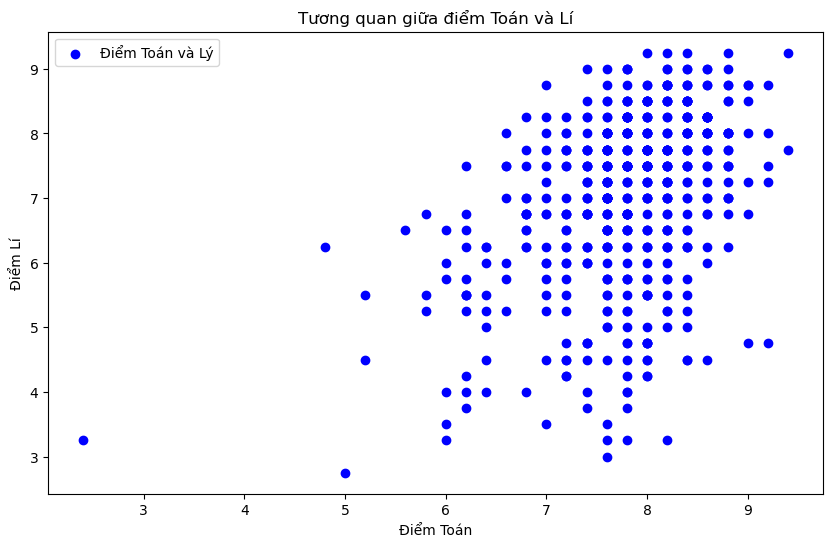

In [17]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(df_toan_li['Toán'], df_toan_li['Lí'], color='blue', label='Điểm Toán và Lý')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Tương quan giữa điểm Toán và Lí')
plt.xlabel('Điểm Toán')
plt.ylabel('Điểm Lí')
plt.legend()

# Hiển thị biểu đồ
plt.show()


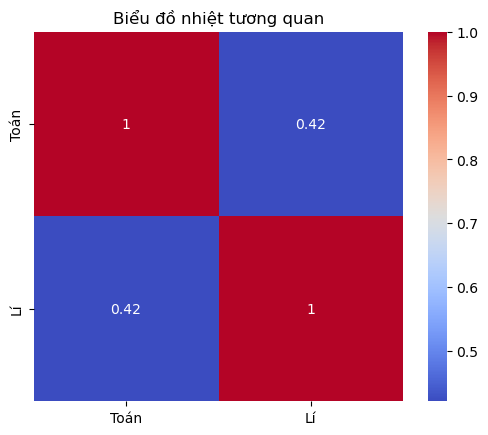

In [18]:
# Biểu đồ nhiệt
import seaborn as sns
correlation1 = df_toan_li[['Toán', 'Lí']].corr()
sns.heatmap(correlation1, annot=True, cmap='coolwarm', square=True)
plt.title('Biểu đồ nhiệt tương quan')
plt.show()

In [19]:
dfhs = pd.concat([df2, df4], axis=0)
df_hoa_sinh = dfhs[['Hóa', 'Sinh']]

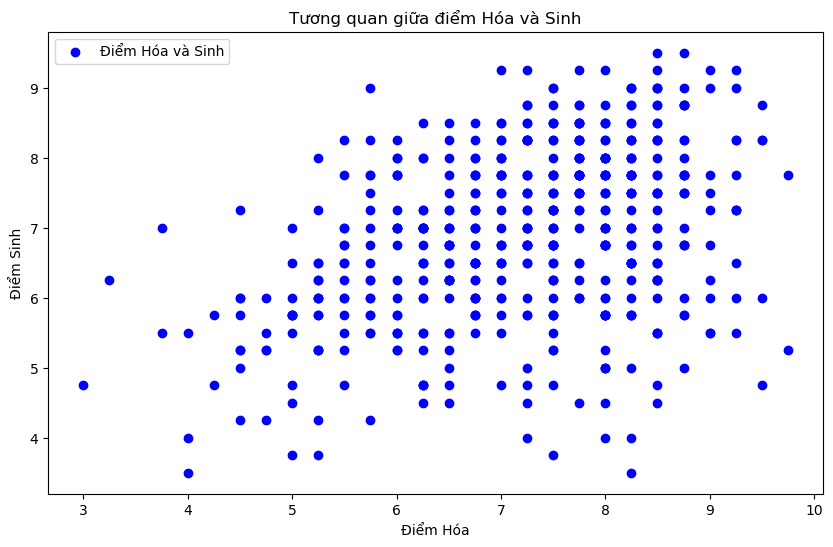

In [20]:
# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 6))
plt.scatter(df_hoa_sinh['Hóa'], df_hoa_sinh['Sinh'], color='blue', label='Điểm Hóa và Sinh')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Tương quan giữa điểm Hóa và Sinh')
plt.xlabel('Điểm Hóa')
plt.ylabel('Điểm Sinh')
plt.legend()

# Hiển thị biểu đồ
plt.show()

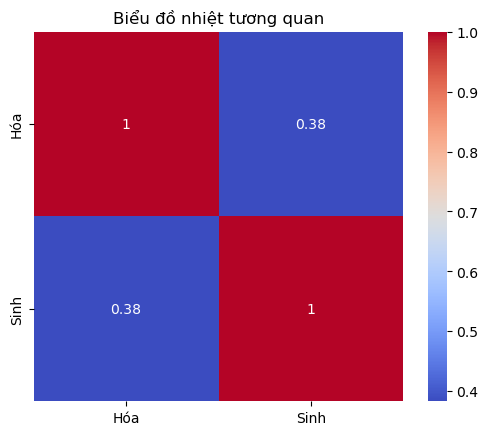

In [21]:
# Biểu đồ nhiệt
import seaborn as sns
correlation2 = df_hoa_sinh[['Hóa', 'Sinh']].corr()
sns.heatmap(correlation2, annot=True, cmap='coolwarm', square=True)
plt.title('Biểu đồ nhiệt tương quan')
plt.show()

In [45]:
dft = pd.concat([df1, df2], axis=0)

In [46]:
dft=dft[['SBD', 'Toán']]

In [47]:
dft1 = pd.concat([df3, df4], axis=0)

In [48]:
dft1=dft1[['SBD', 'Toán']]

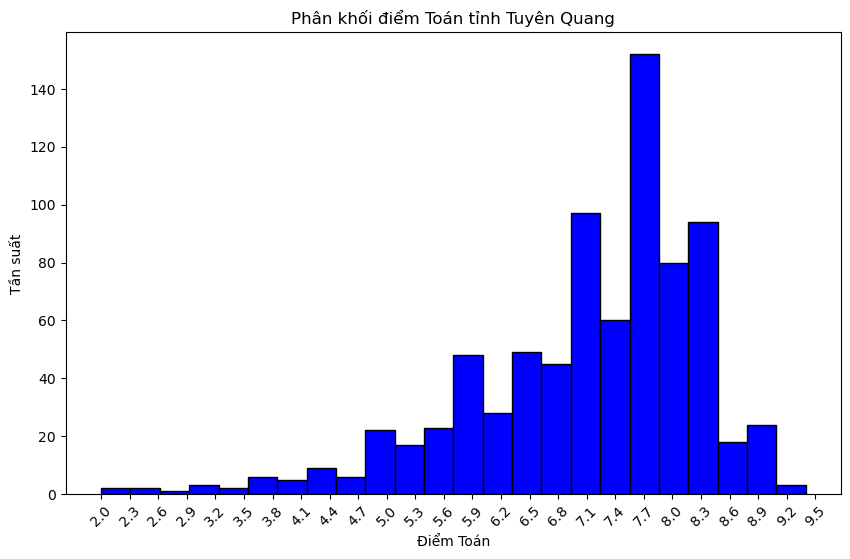

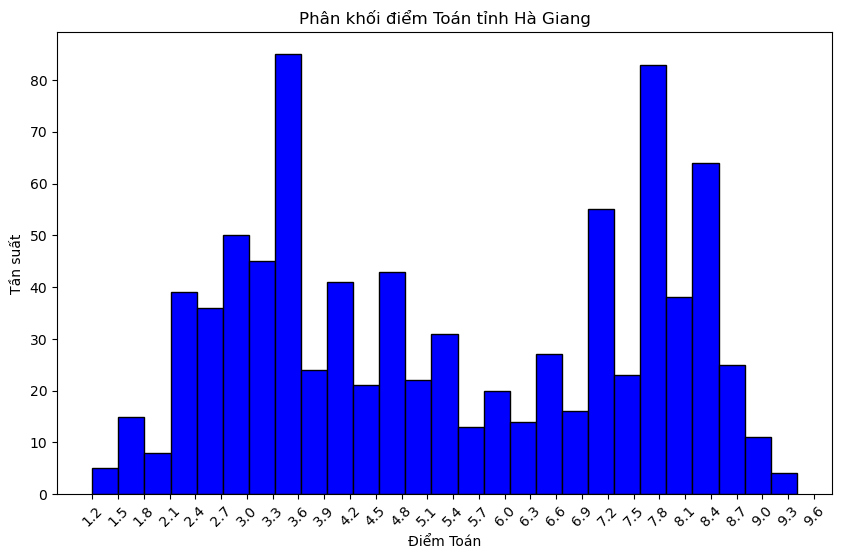

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Xác định số lượng bins dựa trên khoảng giá trị của dữ liệu và kích thước mỗi bin
bin_width = 0.3
min_score = dft['Toán'].min()
max_score = dft['Toán'].max()
bins = int((max_score - min_score) / bin_width)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(dft['Toán'], bins=bins, color='blue', edgecolor='black')
plt.title('Phân khối điểm Toán tỉnh Tuyên Quang')
plt.xlabel('Điểm Toán')
plt.ylabel('Tần suất')

# Đặt các nhãn cho trục x với khoảng cách là 0.3
x_ticks = np.arange(min_score, max_score + bin_width, bin_width)
plt.xticks(x_ticks, rotation=45)

# Hiển thị biểu đồ
plt.show()

# Xác định số lượng bins dựa trên khoảng giá trị của dữ liệu và kích thước mỗi bin
bin_width = 0.3
min_score = dft1['Toán'].min()
max_score = dft1['Toán'].max()
bins = int((max_score - min_score) / bin_width)

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(dft1['Toán'], bins=bins, color='blue', edgecolor='black')
plt.title('Phân khối điểm Toán tỉnh Hà Giang')
plt.xlabel('Điểm Toán')
plt.ylabel('Tần suất')

# Đặt các nhãn cho trục x với khoảng cách là 0.3
x_ticks = np.arange(min_score, max_score + bin_width, bin_width)
plt.xticks(x_ticks, rotation=45)

# Hiển thị biểu đồ
plt.show()

          Tỉnh  Số lượng thí sinh đỗ
0  Tuyên Quang                   246
1     Hà Giang                   122


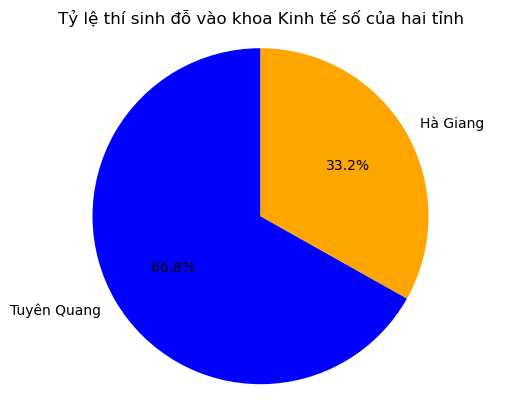

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Hàm tính điểm theo từng khối
def tinh_diem_khoi(row, mon1, mon2, mon3):
    return row[mon1] + row[mon2] + row[mon3]

# Hàm tính số lượng học sinh đỗ theo từng khối
def so_luong_do(df, khoi):
    count = 0
    for _, row in df.iterrows():
        if tinh_diem_khoi(row, *khoi) >= 24.9:
            count += 1
    return count

# Các khối thi
khoi_A00 = ('Toán', 'Lí', 'Hóa')
khoi_A01 = ('Toán', 'Lí', 'Ngoại ngữ')
khoi_D01 = ('Toán', 'Văn', 'Ngoại ngữ')
khoi_C01 = ('Văn', 'Toán', 'Lí')

# Tính số lượng học sinh đỗ cho từng tỉnh và từng khối
danh_sach_khoi = [khoi_A00, khoi_A01, khoi_D01, khoi_C01]

# Kết hợp dữ liệu các tỉnh
df_tuyen_quang = pd.concat([df1, df2], ignore_index=True)
df_ha_giang = pd.concat([df3, df4], ignore_index=True)

# Tính số lượng học sinh đỗ
so_luong_do_tuyen_quang = sum([so_luong_do(df_tuyen_quang, khoi) for khoi in danh_sach_khoi])
so_luong_do_ha_giang = sum([so_luong_do(df_ha_giang, khoi) for khoi in danh_sach_khoi])

# Tạo DataFrame kết quả
df_ket_qua = pd.DataFrame({
    'Tỉnh': ['Tuyên Quang', 'Hà Giang'],
    'Số lượng thí sinh đỗ': [so_luong_do_tuyen_quang, so_luong_do_ha_giang]
})

# In DataFrame kết quả để kiểm tra
print(df_ket_qua)

# Kiểm tra xem tổng số thí sinh đỗ có bằng 0 hay không
if df_ket_qua['Số lượng thí sinh đỗ'].sum() == 0:
    print("Không có thí sinh nào đỗ vào khoa Kinh tế số.")
else:
    # Vẽ biểu đồ tròn
    fig, ax = plt.subplots()
    ax.pie(df_ket_qua['Số lượng thí sinh đỗ'], labels=df_ket_qua['Tỉnh'], autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Tỷ lệ thí sinh đỗ vào khoa Kinh tế số của hai tỉnh')
    plt.show()
